Predicted_Item: Test_Data_Items:      Test_Item: 
Muffin           [36 16 24 12  9  1]    Muffin
Muffin           [38 15 23 15  8  0]    Muffin
Scone           [33  7 42  4  0  8]    Scone
Cupcake           [44  2 26 16  8  2]    Cupcake
Scone           [29  3 46  6  0 11]    Scone
Cupcake           [42 21 23  7  4  2]    Cupcake
Cupcake           [47 18 20  7  5  1]    Cupcake
Muffin           [33 14 21 14 11  2]    Muffin
Muffin           [36 13 22 19 10  1]    Muffin
Cupcake           [34  8  4 10 40  2]    Cupcake


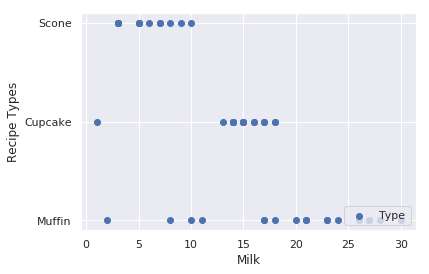

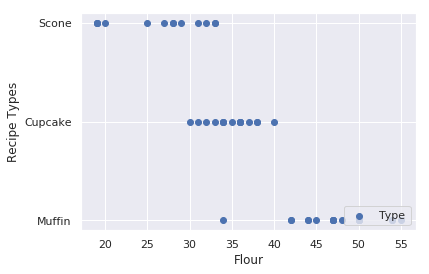

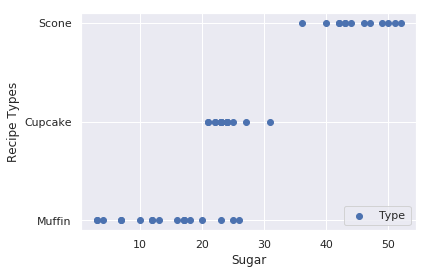

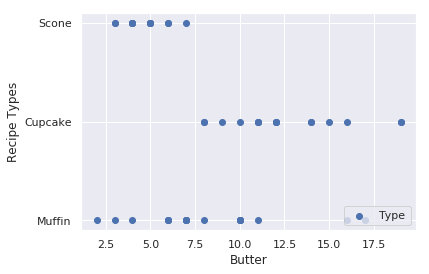

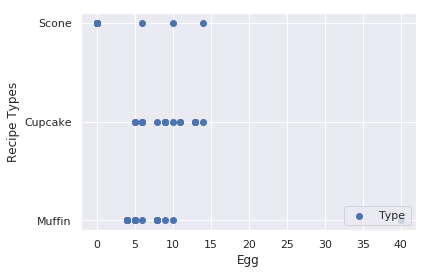

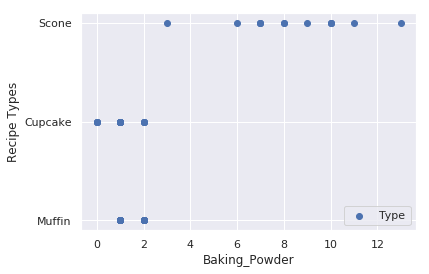

You're looking at a Cup cake recipe!


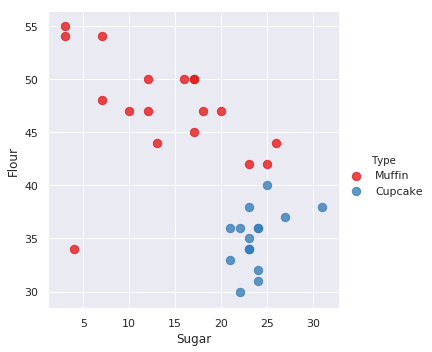

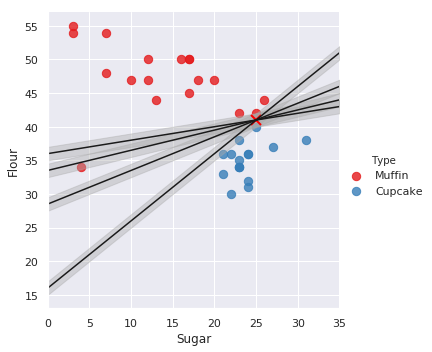

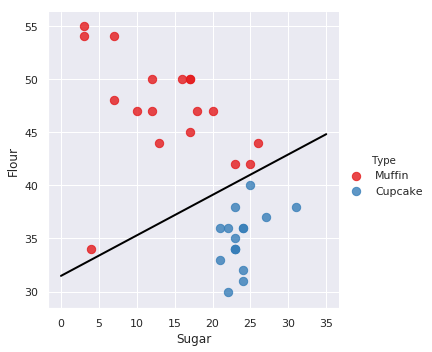

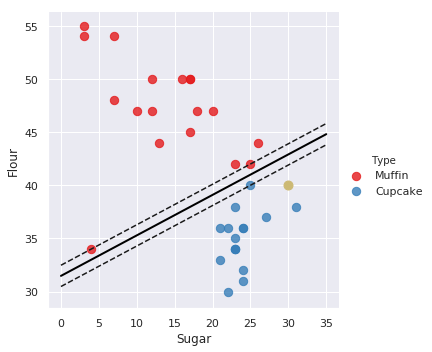

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
from sklearn import svm
from sklearn import preprocessing,linear_model
from sklearn import metrics
import pickle

# Function to Allows charts those appear in the notebook
%matplotlib inline

# Read data from the directory
data_Directory = "/home/omkaram/Desktop/SVM_Classification/RecipesWithMoreSamples/recipes_muffins_cupcakes_scones_new_data.csv" 
raw_data_recipes = pd.read_csv(data_Directory)
#print(raw_data_recipes)

prediction_column = "Type"
lst_label = preprocessing.LabelEncoder()
lst_type = lst_label.fit_transform(list(raw_data_recipes[prediction_column]))

X = np.array(raw_data_recipes.drop([prediction_column],1))
Y = list(lst_type)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2)
#print(x_train,y_train)

# SVM best fit model
# model has iterated untill to get the 100% accuracy for linear and polynomial
'''
best= 0
for i in range(1,31):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2)
    #clf = svm.SVC(kernel="linear")
    clf = svm.SVC(kernel="poly",degree=2,gamma="auto")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    if acc>best:
        best = acc
        print("Model Accuracy is: ",best)
        #with open("/home/omkaram/Desktop/SVM_Classification/RecipesWithMoreSamples/Modeled_Linear_recipesMoreData.pickle", "wb") as f:
        with open("/home/omkaram/Desktop/SVM_Classification/RecipesWithMoreSamples/Modeled_Polynomial_recipesMoreData.pickle", "wb") as f:
            pickle.dump(clf, f)
'''

# LOAD MODEL
#pickle_in = open("/home/omkaram/Desktop/SVM_Classification/RecipesWithMoreSamples/Modeled_Linear_recipesMoreData.pickle", "rb")
pickle_in = open("/home/omkaram/Desktop/SVM_Classification/RecipesWithMoreSamples/Modeled_Polynomial_recipesMoreData.pickle", "rb")
model = pickle.load(pickle_in)

# print model Cofficients (no cofficients for polynomial model) & intercept
#print("-------------------------")
#print('Coefficient: \n', model.coef_)
#print('Intercept: \n', model.intercept_)
#print("-------------------------")


recipe_names = ["Muffin","Cupcake","Scone"]
predicted_recipe= model.predict(x_test)
print("Predicted_Item:","Test_Data_Items:","    ","Test_Item: ")
for x in range(len(predicted_recipe)):
    print(recipe_names[predicted_recipe[x]],"         ", x_test[x],"  ", recipe_names[y_test[x]])
    
def plot_item(recipe_item):
    plot = recipe_item
    plt.scatter(raw_data_recipes[plot], raw_data_recipes["Type"])
    plt.legend(loc=4)
    plt.xlabel(plot)
    plt.ylabel("Recipe Types")
    plt.show()
    
plot_item("Milk")
plot_item("Flour")
plot_item("Sugar")
plot_item("Butter")
plot_item("Egg")
plot_item("Baking_Powder")

# SVM classification for muffins_vs_cupcakes, muffins_vs_scones & cupcakes_vs_scones
classification_data = pd.read_csv('/home/omkaram/Desktop/SVM_Classification/RecipesWithMoreSamples/recipes_muffins_cupcakes_new_data.csv')
#classification_data = pd.read_csv('/home/omkaram/Desktop/SVM_Classification/RecipesWithMoreSamples/recipes_muffins_scones_new_data.csv')
#classification_data = pd.read_csv('/home/omkaram/Desktop/SVM_Classification/RecipesWithMoreSamples/recipes_cupcakes_scones_new_data.csv')
#print(classification_data)

# Plot selected ingredients
def plot_ingredients(a,b,item1,item2):
    X = a
    Y = b
    sns.lmplot(X, Y, data=classification_data, hue='Type',palette='Set1', fit_reg=False, scatter_kws={"s": 70});

    # Specify inputs for the model
    ingredients = classification_data[[X,Y]].values
    type_label = np.where(classification_data['Type']=='Muffin', 0, 1)  # muffins_vs_cupcakes & muffins_vs_scones
    #type_label = np.where(classification_data['Type']=='Cupcake', 0, 1) # cupcakes_vs_scones
    recipe_features = classification_data.columns.values[1:].tolist()
    
    model = svm.SVC(kernel='linear')
    model.fit(ingredients, type_label)

    # Get the separating hyperplane
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0,35) # muffins_vs_cupcakes
    #xx = np.linspace(0,55) # muffins_vs_scones
    #xx = np.linspace(20,55) # cupcakes_vs_scones
    yy = a * xx - (model.intercept_[0]) / w[1]

    # Plot the parallels to the separating hyperplane that pass through the support vectors
    b = model.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = model.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])
    
    
    xfit= np.linspace(0,35) # muffins_vs_cupcakes
    #xfit= np.linspace(0,55) # muffins_vs_scones
    #xfit= np.linspace(20,55) # cupcakes_vs_scones
    sns.lmplot(X, Y, data=classification_data, hue='Type',palette='Set1', fit_reg=False, scatter_kws={"s": 70});
    plt.plot([25],[41],'x',color='red',markeredgewidth=2,markersize=10) # muffins_vs_cupcakes
    #plt.plot([30],[31],'x',color='red',markeredgewidth=2,markersize=10) # muffins_vs_scones
    #plt.plot([40],[40],'x',color='red',markeredgewidth=2,markersize=10) # cupcakes_vs_scones
    
    lst = [(1,16),(0.5,28.5),(0.2,36),(0.3,33.5)]  # muffins_vs_cupcakes
    #lst = [(1,1),(0.3,22),(0.5,16),(2,-29),(1.5,-14)] # muffins_vs_scones
    #lst = [(1,0),(0.7,12),(1.2,-8),(1.5,-20)] # cupcakes_vs_scones
    for i in range(len(lst)):
        for m, b in [lst[i]]:
            d = 1
            yfit = m*xfit+b
            plt.plot(xfit, yfit, '-k')
            plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA',alpha=0.4)
            plt.xlim(0,35);  # muffins_vs_cupcakes
            #plt.xlim(0,55);  # muffins_vs_scones
            #plt.xlim(20,55);  # cupcakes_vs_scones
            
    # Plot the hyperplane
    sns.lmplot(X, Y, data=classification_data, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
    plt.plot(xx, yy, linewidth=2, color='black');

    # Look at the margins and support vectors
    sns.lmplot(X, Y, data=classification_data, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
    plt.plot(xx, yy, linewidth=2, color='black')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=80, facecolors='none');
    
    # Which Item Is It?
    if(model.predict([[item1, item2]]))==0:
        print('You\'re looking at a {} recipe!'.format("Muffin"))
    else:
        #print('You\'re looking at a {} recipe!'.format("Scone"))
        print('You\'re looking at a {} recipe!'.format("Cup cake"))
    
    plt.plot(item1,item2, 'yo', markersize='9')
    
X = 'Sugar'
Y = 'Flour'
Sugar_Parts = 30
Flour_Parts = 40
plot_ingredients(X,Y,Sugar_Parts,Flour_Parts)

